In [1]:
import random
import numpy as np
import sys
sys.path.append('../')

In [2]:
from gaussian_mixture_em import GaussianMixtureEM

In [3]:
from sklearn.datasets import load_iris
data = load_iris()
data.keys()

data['data'].shape, data['target'].shape

((150, 4), (150,))

In [4]:
n_class = len(np.unique(data['target']))
n_class

3

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data['data'])

In [6]:
model = GaussianMixtureEM(n_class, max_iter=300)
model.fit(X, data['target'])
pred = model.predict(X)

In [7]:
print(model.pi)

[0.2955138  0.40950218 0.29498402]


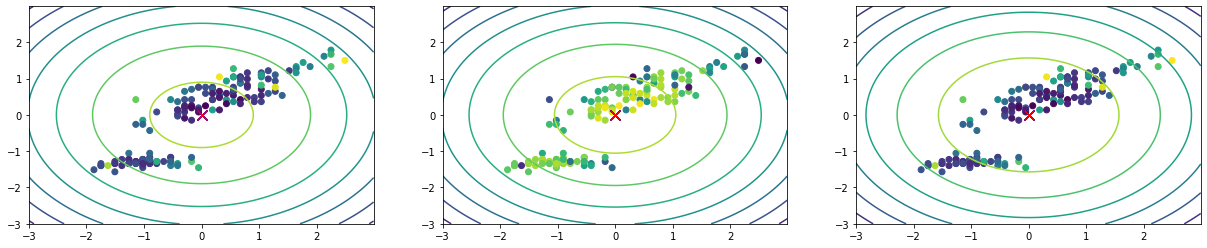

In [9]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
matplotlib.rcParams['figure.figsize'] = (21, 4)
ax = 0
ay = 2

mu = model.mu
cov = model.cov
rnk = model.rnk
for k in range(n_class):
    plt.subplot(1, n_class, k+1)
    plt.scatter(X[:, ax], X[:, ay], c=rnk[:, k])
    plt.scatter(mu[:, ax], mu[:, ay], c='b', marker='x', s=100)
    plt.scatter(mu[k, ax], mu[k, ay], c='r', marker='x', s=100)
    
    rv = multivariate_normal(mu[k, [ax, ay]], cov[k, [ax, ay], [ax, ay]])
    x, y = np.mgrid[-3:3:.01, -3:3:.01]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    plt.contour(x, y, rv.pdf(pos))